In [1]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
os.listdir()

['.DS_Store',
 'nyc_crime.ipynb',
 'shapefiles',
 'NYPD_Complaint_Data_Historic.csv',
 'README.md',
 '.gitignore',
 '.ipynb_checkpoints',
 '.git',
 'nyc_crime_complaints_2021.csv',
 'data_export.ipynb',
 'clustering.ipynb']

In [3]:
complaints = pd.read_csv('nyc_crime_complaints_2021.csv') # read in data
complaints['RPT_DT'] = pd.to_datetime(complaints['RPT_DT']) # converting date objects to datetimes
complaints['CMPLNT_START_DT'] = pd.to_datetime(complaints['CMPLNT_START_DT'])
complaints['CMPLNT_END_DT'] = pd.to_datetime(complaints['CMPLNT_END_DT'])

In [4]:
complaints.head(10)

,Unnamed: 0,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,...,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,CMPLNT_START_DT,CMPLNT_END_DT
0,681171,432371969,12/31/2021,18:20:00,12/31/2021,18:30:00,111.0,2021-12-31,113,FORGERY,...,40.746775,-73.780867,"(40.74677541300008, -73.78086726799995)",PATROL BORO QUEENS NORTH,NaN,UNKNOWN,UNKNOWN,E,2021-12-31 18:20:00,2021-12-31 18:30:00
1,681230,217646811,12/29/2021,18:00:00,12/31/2021,08:00:00,114.0,2021-12-31,341,PETIT LARCENY,...,40.784364,-73.912857,"(40.78436449400005, -73.91285663499998)",PATROL BORO QUEENS NORTH,NaN,25-44,WHITE,M,2021-12-29 18:00:00,2021-12-31 08:00:00
2,681232,242760359,12/21/2021,18:30:00,12/22/2021,07:45:00,77.0,2021-12-22,341,PETIT LARCENY,...,40.669258,-73.939430,"(40.669258167000066, -73.93943014499997)",PATROL BORO BKLYN NORTH,NaN,45-64,BLACK,F,2021-12-21 18:30:00,2021-12-22 07:45:00
3,681291,774773388,12/26/2021,15:10:00,12/26/2021,15:16:00,6.0,2021-12-26,126,MISCELLANEOUS PENAL LAW,...,40.727315,-73.997415,"(40.72731493200007, -73.99741456099997)",PATROL BORO MAN SOUTH,NaN,45-64,BLACK,F,2021-12-26 15:10:00,2021-12-26 15:16:00
4,681396,805116197,12/26/2021,18:00:00,12/26/2021,21:00:00,14.0,2021-12-27,109,GRAND LARCENY,...,40.749755,-73.985615,"(40.749755161000046, -73.98561539199994)",PATROL BORO MAN SOUTH,NaN,45-64,WHITE,F,2021-12-26 18:00:00,2021-12-26 21:00:00
5,681435,320847553,12/29/2021,11:09:00,12/29/2021,11:52:00,14.0,2021-12-29,109,GRAND LARCENY,...,40.752264,-73.991559,"(40.75226444800006, -73.99155933799993)",PATROL BORO MAN SOUTH,NaN,25-44,WHITE,F,2021-12-29 11:09:00,2021-12-29 11:52:00
6,681613,829808403,12/26/2021,20:25:00,12/26/2021,20:57:00,20.0,2021-12-26,118,DANGEROUS WEAPONS,...,40.774164,-73.984881,"(40.77416407000004, -73.984880805)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,E,2021-12-26 20:25:00,2021-12-26 20:57:00
7,681692,704234998,12/23/2021,14:00:00,12/27/2021,05:45:00,45.0,2021-12-27,107,BURGLARY,...,40.826325,-73.840120,"(40.826324820000025, -73.84012009199995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,D,2021-12-23 14:00:00,2021-12-27 05:45:00
8,681714,923537396,12/26/2021,23:00:00,12/27/2021,07:00:00,78.0,2021-12-27,107,BURGLARY,...,40.675641,-73.982574,"(40.67564067200004, -73.98257421899994)",PATROL BORO BKLYN SOUTH,NaN,45-64,WHITE,F,2021-12-26 23:00:00,2021-12-27 07:00:00
9,681875,246003700,12/08/2021,11:20:00,12/08/2021,11:30:00,1.0,2021-12-08,344,ASSAULT 3 & RELATED OFFENSES,...,40.709532,-74.001668,"(40.70953164600007, -74.00166786599993)",PATROL BORO MAN SOUTH,NaN,25-44,WHITE,M,2021-12-08 11:20:00,2021-12-08 11:30:00


In [5]:
features = complaints[['KY_CD', 'PD_CD', 'CRM_ATPT_CPTD_CD', 'BORO_NM', 'LAW_CAT_CD', 
                 'JURISDICTION_CODE', 'Latitude', 'Longitude']]
                    # 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'PATROL_BORO', 'VIC_AGE_GROUP',
                 #'VIC_RACE', 'VIC_SEX', LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC']]

In [6]:
features.isna().sum()

KY_CD                  0
PD_CD                  0
CRM_ATPT_CPTD_CD      60
BORO_NM              224
LAW_CAT_CD             0
JURISDICTION_CODE      0
Latitude               0
Longitude              0
dtype: int64

In [7]:
X = features.copy()
X.dropna(inplace=True)
indexs = X.index # used for filtering the complaints data set
X.reset_index(inplace=True, drop=True)
X = pd.get_dummies(X) # one hot encoding

In [8]:
scaler = StandardScaler()
scale_dat = X[['JURISDICTION_CODE', 'KY_CD', 'PD_CD']] # scaling numerical variables (non-binary)
X_scaled = pd.DataFrame(scaler.fit_transform(scale_dat), columns=scale_dat.columns)
X_scaled = pd.concat([X_scaled, X.drop(['KY_CD', 'PD_CD', 'JURISDICTION_CODE'], axis=1)], axis=1) # appending binary's

In [9]:
X_scaled.columns

Index(['JURISDICTION_CODE', 'KY_CD', 'PD_CD', 'Latitude', 'Longitude',
       'CRM_ATPT_CPTD_CD_ATTEMPTED', 'CRM_ATPT_CPTD_CD_COMPLETED',
       'BORO_NM_BRONX', 'BORO_NM_BROOKLYN', 'BORO_NM_MANHATTAN',
       'BORO_NM_QUEENS', 'BORO_NM_STATEN ISLAND', 'LAW_CAT_CD_FELONY',
       'LAW_CAT_CD_MISDEMEANOR', 'LAW_CAT_CD_VIOLATION'],
      dtype='object')

In [10]:
pca = PCA(n_components=0.9, random_state=10).fit(X_scaled) # applying PCA dimensionality reduction
X_pca = pca.transform(X_scaled)

Text(0, 0.5, 'SSE')

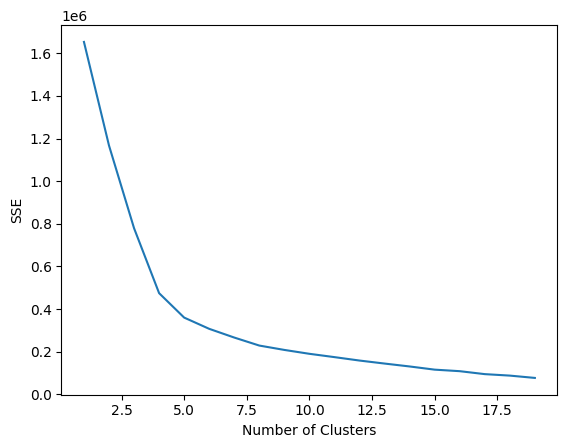

In [11]:
SSE = [] # fitting kmeans model with different number of clusters, select K at elbow of plot 
for k in range(1, 20):
    k_means = KMeans(n_clusters=k, max_iter=100, random_state=2)
    k_means.fit(X_pca)
    SSE.append(k_means.inertia_)

plt.plot(range(1, 20), SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

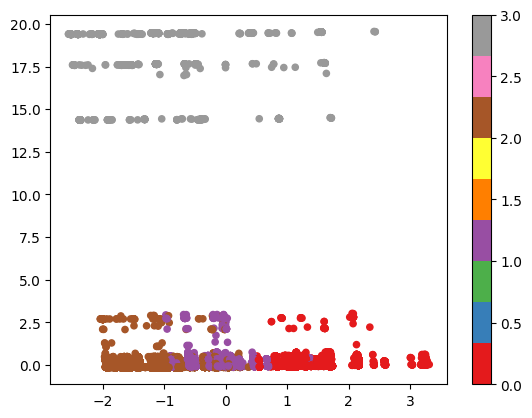

In [12]:
kmeans = KMeans(n_clusters=4, n_init=100, 
                random_state=10) # fit kmean with decided number of clusters
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_
# plotting data with respect to the first two principle components, colored by cluster ID
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, s=20,cmap='Set1');
plt.colorbar()

In [13]:
clustered_data = complaints.iloc[indexs,:].copy() # filtering original data and appending cluster ID's
clustered_data['Cluster_ID'] = cluster_labels

In [14]:
clustered_data

,Unnamed: 0,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,...,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,CMPLNT_START_DT,CMPLNT_END_DT,Cluster_ID
0,681171,432371969,12/31/2021,18:20:00,12/31/2021,18:30:00,111.0,2021-12-31,113,FORGERY,...,-73.780867,"(40.74677541300008, -73.78086726799995)",PATROL BORO QUEENS NORTH,NaN,UNKNOWN,UNKNOWN,E,2021-12-31 18:20:00,2021-12-31 18:30:00,2
1,681230,217646811,12/29/2021,18:00:00,12/31/2021,08:00:00,114.0,2021-12-31,341,PETIT LARCENY,...,-73.912857,"(40.78436449400005, -73.91285663499998)",PATROL BORO QUEENS NORTH,NaN,25-44,WHITE,M,2021-12-29 18:00:00,2021-12-31 08:00:00,1
2,681232,242760359,12/21/2021,18:30:00,12/22/2021,07:45:00,77.0,2021-12-22,341,PETIT LARCENY,...,-73.939430,"(40.669258167000066, -73.93943014499997)",PATROL BORO BKLYN NORTH,NaN,45-64,BLACK,F,2021-12-21 18:30:00,2021-12-22 07:45:00,1
3,681291,774773388,12/26/2021,15:10:00,12/26/2021,15:16:00,6.0,2021-12-26,126,MISCELLANEOUS PENAL LAW,...,-73.997415,"(40.72731493200007, -73.99741456099997)",PATROL BORO MAN SOUTH,NaN,45-64,BLACK,F,2021-12-26 15:10:00,2021-12-26 15:16:00,2
4,681396,805116197,12/26/2021,18:00:00,12/26/2021,21:00:00,14.0,2021-12-27,109,GRAND LARCENY,...,-73.985615,"(40.749755161000046, -73.98561539199994)",PATROL BORO MAN SOUTH,NaN,45-64,WHITE,F,2021-12-26 18:00:00,2021-12-26 21:00:00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400631,1677428,631903360,01/04/2021,00:00:00,01/04/2021,00:10:00,34.0,2021-01-04,578,HARRASSMENT 2,...,-73.927449,"(40.866639255000045, -73.92744941199999)",PATROL BORO MAN NORTH,NaN,45-64,WHITE HISPANIC,F,2021-01-04 00:00:00,2021-01-04 00:10:00,0
400632,1677429,695555770,01/07/2021,00:55:00,01/07/2021,01:20:00,84.0,2021-01-07,118,DANGEROUS WEAPONS,...,-73.988971,"(40.69010641500005, -73.98897094299997)",PATROL BORO BKLYN NORTH,NaN,UNKNOWN,UNKNOWN,E,2021-01-07 00:55:00,2021-01-07 01:20:00,2
400633,1677430,147985546,01/08/2021,19:00:00,01/08/2021,19:30:00,113.0,2021-01-09,578,HARRASSMENT 2,...,-73.763156,"(40.683322412000045, -73.76315613299995)",PATROL BORO QUEENS SOUTH,NaN,18-24,BLACK,F,2021-01-08 19:00:00,2021-01-08 19:30:00,0
400634,1677431,153855183,01/03/2021,19:15:00,01/03/2021,19:22:00,14.0,2021-01-03,341,PETIT LARCENY,...,-73.994696,"(40.75560773700005, -73.99469553799997)",PATROL BORO MAN SOUTH,NaN,18-24,WHITE,F,2021-01-03 19:15:00,2021-01-03 19:22:00,1


In [15]:
clust0 = clustered_data[clustered_data['Cluster_ID'] == 0] # creating individual data frames
clust1 = clustered_data[clustered_data['Cluster_ID'] == 1]
clust2 = clustered_data[clustered_data['Cluster_ID'] == 2]
clust3 = clustered_data[clustered_data['Cluster_ID'] == 3]

In [16]:
clust0.shape, clust1.shape, clust2.shape, clust3.shape #, clust4.shape

((104020, 39), (162946, 39), (132250, 39), (1164, 39))

In [17]:
# creating normalized value counts for each cluster for stacked bar chart
clust0_val = clust0.OFNS_DESC.value_counts().reindex(clustered_data.OFNS_DESC.unique(), fill_value=0)/clustered_data.OFNS_DESC.value_counts().reindex(clustered_data.OFNS_DESC.unique())
clust1_val = clust1.OFNS_DESC.value_counts().reindex(clustered_data.OFNS_DESC.unique(), fill_value=0)/clustered_data.OFNS_DESC.value_counts().reindex(clustered_data.OFNS_DESC.unique())
clust2_val = clust2.OFNS_DESC.value_counts().reindex(clustered_data.OFNS_DESC.unique(), fill_value=0)/clustered_data.OFNS_DESC.value_counts().reindex(clustered_data.OFNS_DESC.unique())
clust3_val = clust3.OFNS_DESC.value_counts().reindex(clustered_data.OFNS_DESC.unique(), fill_value=0)/clustered_data.OFNS_DESC.value_counts().reindex(clustered_data.OFNS_DESC.unique())

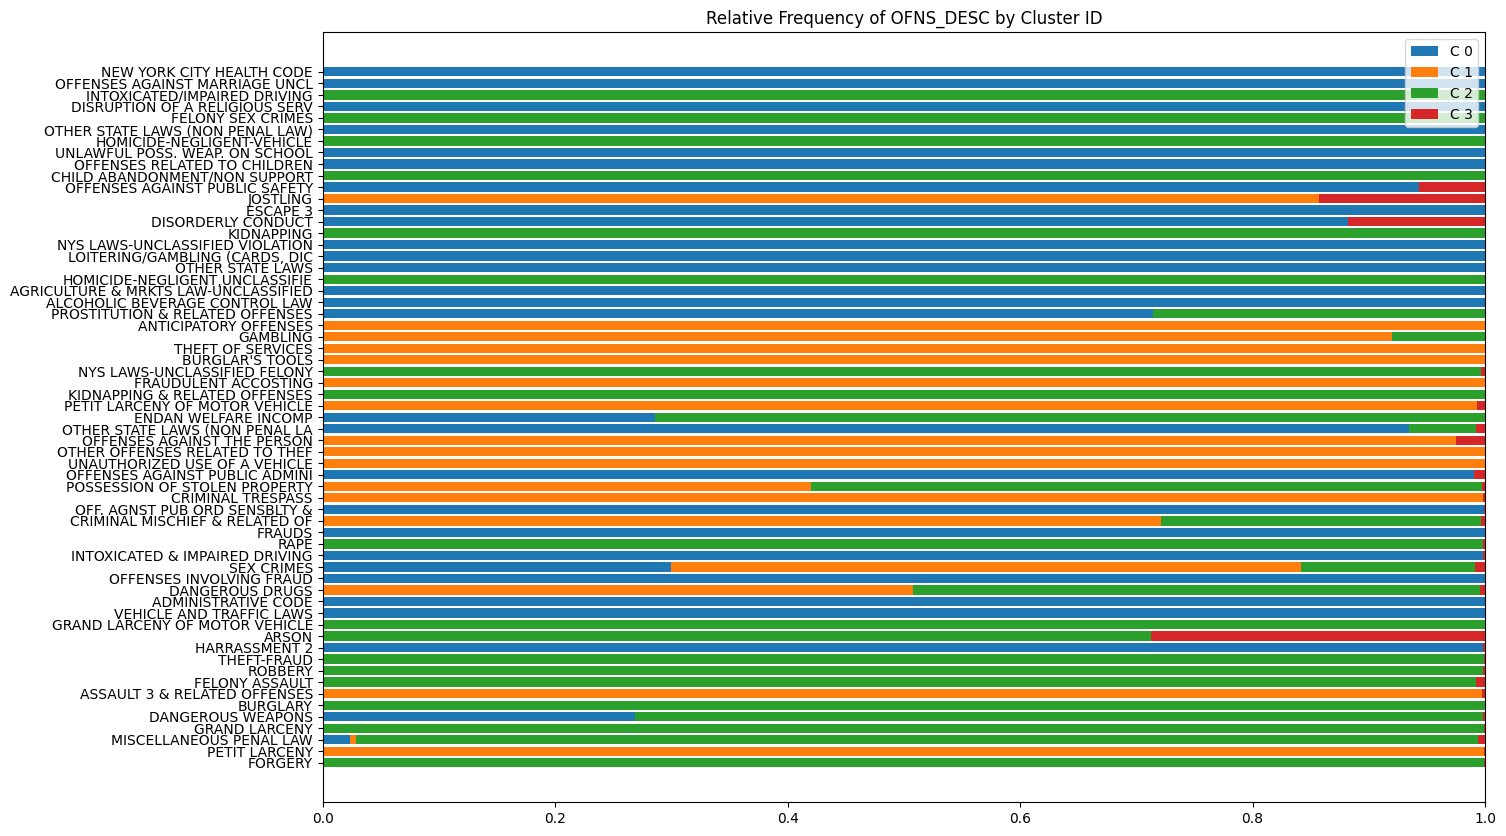

In [18]:
# plotting OFNS_DESC normalized counts
fig, ax = plt.subplots(figsize = (15,10))
ax.barh(clust0_val.index, clust0_val, label = 'C 0')
ax.barh(clust1_val.index, clust1_val, left=clust0_val, label='C 1')
ax.barh(clust2_val.index, clust2_val, left=clust0_val+clust1_val, label='C 2')
ax.barh(clust3_val.index, clust3_val, left=clust0_val+clust1_val+clust2_val, label='C 3')
ax.set_title('Relative Frequency of OFNS_DESC by Cluster ID')
ax.legend()

In [19]:
clust0_val = clust0.LAW_CAT_CD.value_counts().reindex(clustered_data.LAW_CAT_CD.unique(), fill_value=0)/clustered_data.LAW_CAT_CD.value_counts().reindex(clustered_data.LAW_CAT_CD.unique())
clust1_val = clust1.LAW_CAT_CD.value_counts().reindex(clustered_data.LAW_CAT_CD.unique(), fill_value=0)/clustered_data.LAW_CAT_CD.value_counts().reindex(clustered_data.LAW_CAT_CD.unique())
clust2_val = clust2.LAW_CAT_CD.value_counts().reindex(clustered_data.LAW_CAT_CD.unique(), fill_value=0)/clustered_data.LAW_CAT_CD.value_counts().reindex(clustered_data.LAW_CAT_CD.unique())
clust3_val = clust3.LAW_CAT_CD.value_counts().reindex(clustered_data.LAW_CAT_CD.unique(), fill_value=0)/clustered_data.LAW_CAT_CD.value_counts().reindex(clustered_data.LAW_CAT_CD.unique())

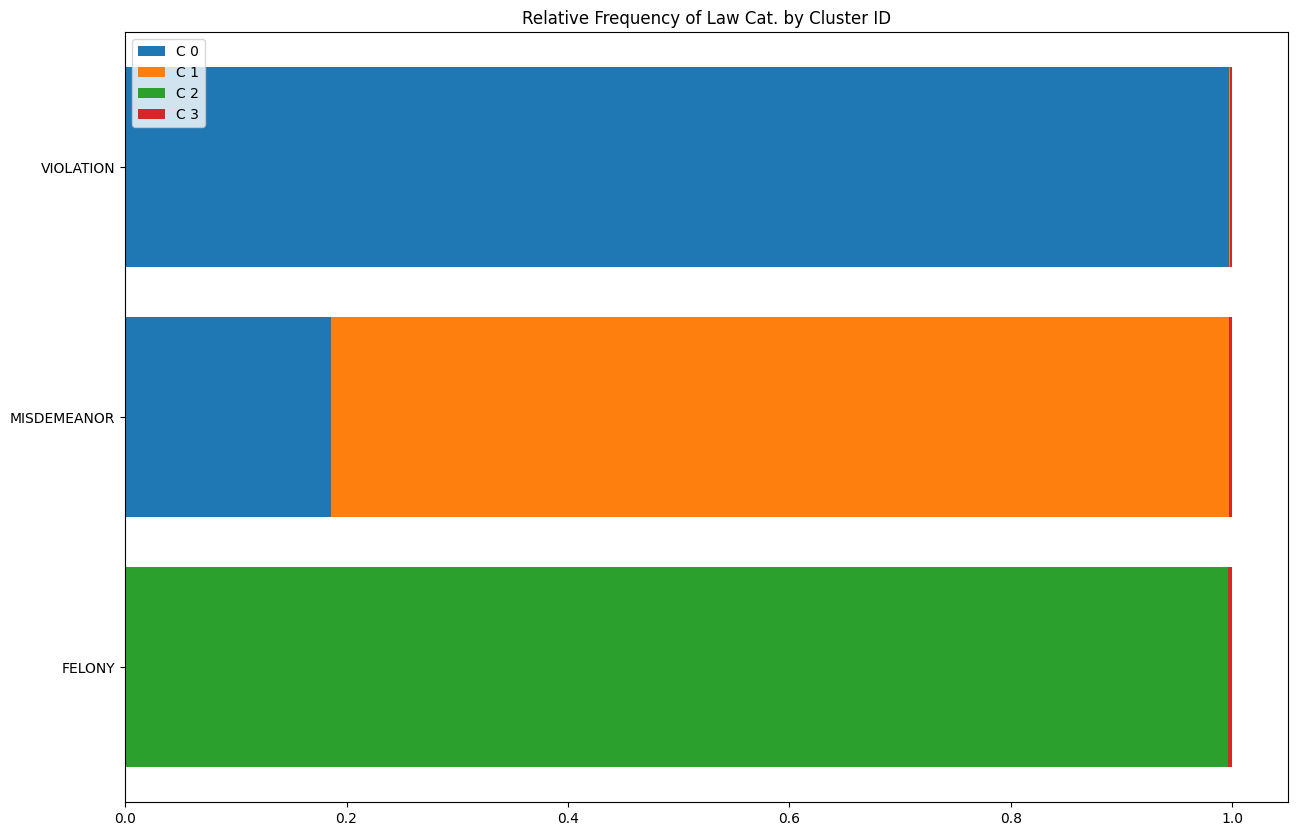

In [20]:
# plotting normalized frequency of LAW_CAT_CD
fig, ax = plt.subplots(figsize = (15,10))
ax.barh(clust0_val.index, clust0_val, label = 'C 0')
ax.barh(clust1_val.index, clust1_val, left=clust0_val, label='C 1')
ax.barh(clust2_val.index, clust2_val, left=clust0_val+clust1_val, label='C 2')
ax.barh(clust3_val.index, clust3_val, left=clust0_val+clust1_val+clust2_val, label='C 3')
ax.set_title('Relative Frequency of Law Cat. by Cluster ID')
ax.legend()

In [21]:
clust0.LAW_CAT_CD.value_counts()

VIOLATION      66589
MISDEMEANOR    37431
Name: LAW_CAT_CD, dtype: int64

In [22]:
clust1.LAW_CAT_CD.value_counts()

MISDEMEANOR    162869
VIOLATION          77
Name: LAW_CAT_CD, dtype: int64

In [23]:
clust2.LAW_CAT_CD.value_counts()

FELONY    132250
Name: LAW_CAT_CD, dtype: int64

In [24]:
clust3.LAW_CAT_CD.value_counts()

FELONY         525
MISDEMEANOR    499
VIOLATION      140
Name: LAW_CAT_CD, dtype: int64

In [25]:
clustered_data.to_csv('clustered_data.csv')